In [25]:
from scipy.optimize import curve_fit
from scipy import constants as C
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [62]:
inputs = {
    "path data": "Datos/",
    "data file": "data_and_fit.csv",
}
data=pd.read_csv(inputs["path data"]+inputs["data file"])
data=data.drop("Fit",1)
data["Frecuency"]=data["Frecuency"]*1e9
data["Data"]=data["Data"]*1e-20

In [63]:
def black_body_freq(v, T):
    c = C.c
    k = C.Boltzmann
    h = C.h
    a = 2 * h * v**3 / c**2
    b = h * v / (k * T)
    i = a / (np.exp(b) - 1)
    return i


pars, _ = curve_fit(f=black_body_freq,
                    xdata=data["Frecuency"],
                    ydata=data["Data"],
                    p0=[5])
fit = black_body_freq(
    data["Frecuency"],
    pars[0],
)

In [64]:
data["Frecuency"]=data["Frecuency"]*1e-9
data["Data"]=data["Data"]*1e20
fit=fit*1e20

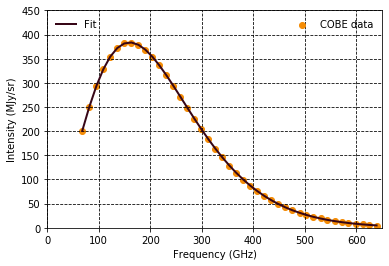

In [65]:
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (MJy/sr)")
plt.ylim(0, 450)
plt.xlim(0, 650)
plt.scatter(data["Frecuency"],
            data["Data"],
            marker="o",
            label="COBE data",
            c="#f48c06")
plt.plot(
    data["Frecuency"],
    fit,
    label="Fit",
    color="#370617",
    lw="2",
)
plt.legend(
    ncol=2,
    mode="expand",
    frameon=False,
)
plt.grid(
    ls="--",
    color="#000000",
)

In [57]:
pars[0]

2.7250124128503574

In [74]:
class fit_black_body:
    def __init__(self, path, filename, T_theoric):
        self.path = path
        self.filename = filename
        self.T_theoric = T_theoric
        self.read_data()

    def read_data(self):
        self.data = pd.read_csv(self.path + self.filename)
        self.format_data()

    def format_data(self):
        self.data = self.data.drop("Fit", 1)
        self.data["Frecuency"] = self.data["Frecuency"] * 1e9
        self.data["Data"] = self.data["Data"] * 1e-20

    def black_body_equation(self, v, T):
        c = C.c
        k = C.Boltzmann
        h = C.h
        a = 2 * h * v**3 / c**2
        b = h * v / (k * T)
        i = a / (np.exp(b) - 1)
        return i

    def fit_data(self):
        self.pars, _ = curve_fit(f=self.black_body_equation,
                                 xdata=self.data["Frecuency"],
                                 ydata=self.data["Data"],
                                 p0=[5])
        self.fit = self.black_body_equation(
            self.data["Frecuency"],
            pars[0],
        )
        self.format_results()

    def format_results(self):
        self.data["Frecuency"] = self.data["Frecuency"] * 1e-9
        self.data["Data"] = self.data["Data"] * 1e20
        self.fit = self.fit * 1e20

    def plot(self):
        plt.xlabel("Frequency (GHz)")
        plt.ylabel("Intensity (MJy/sr)")
        plt.ylim(0, 450)
        plt.xlim(0, 650)
        plt.scatter(list(self.data["Frecuency"]),
                    list(self.data["Data"]),
                    marker="o",
                    label="COBE data",
                    c="#f48c06")
        plt.plot(
            list(self.data["Frecuency"]),
            self.fit,
            label="Fit",
            color="#370617",
            lw="2",
        )
        plt.legend(
            ncol=2,
            mode="expand",
            frameon=False,
        )
        plt.grid(
            ls="--",
            color="#000000",
        )
        plt.show()

    def obtain_RD(self):
        rd = self.RD(self.pars[0], self.T_theoric)
        self.write_results(rd)

    def RD(self, measurement, theoric):
        """
        funcion que calcula la diferencia relativa en porcentajes
        """
        rd = abs((measurement - theoric) / theoric) * 100
        return rd

    def write_RD(self, percentage):
        """
        Funcion que escribe los resultados de la diferencia relativa        
        """
        print("Diferencia relativa es {:.5f}%".format(percentage))
    
    def write_results(self,rd):
        print("La temperatura con la que se realizo el fit es de {}".format(self.pars[0]))
        print("La temperatura de radiación de fondo es {}".format(self.T_theoric))
        self.write_RD(rd)

La temperatura con la que se realizo el fit es de 2.7250124128503574
La temperatura de radiación de fondo es 2.725
Diferencia relativa es 0.00046%


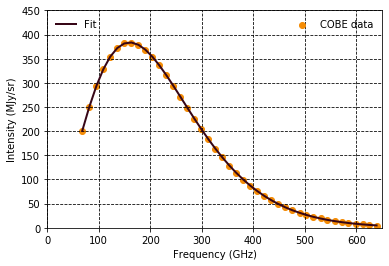

In [75]:
inputs = {
    "path data": "Datos/",
    "data file": "data_and_fit.csv",
    "T theorical": 2.725
}
problem = fit_black_body(
    inputs["path data"],
    inputs["data file"],
    inputs["T theorical"],
)
problem.fit_data()
problem.obtain_RD()
problem.plot()